<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 8: Pengenalan *Neural Networks***

###**Tenggat Waktu: 16 Mei 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab8_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **15 Mei 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [1]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


## **Teori Neural Networks**

### Model MLP (Multilayer Perceptor)

Neural Networks (NN) merupakan sebuah algoritma Machine Learning yang bekerja meniru cara kerja otak manusia. Untuk mendapatkan gambaran yang baik terkait cara kerja algoritma ini, pertama-tama mari kita lihat arsitektur sederhana dari salah satu tipe NN yaitu Multilayer Perceptor (MLP) pada kasus **Binary Classification**: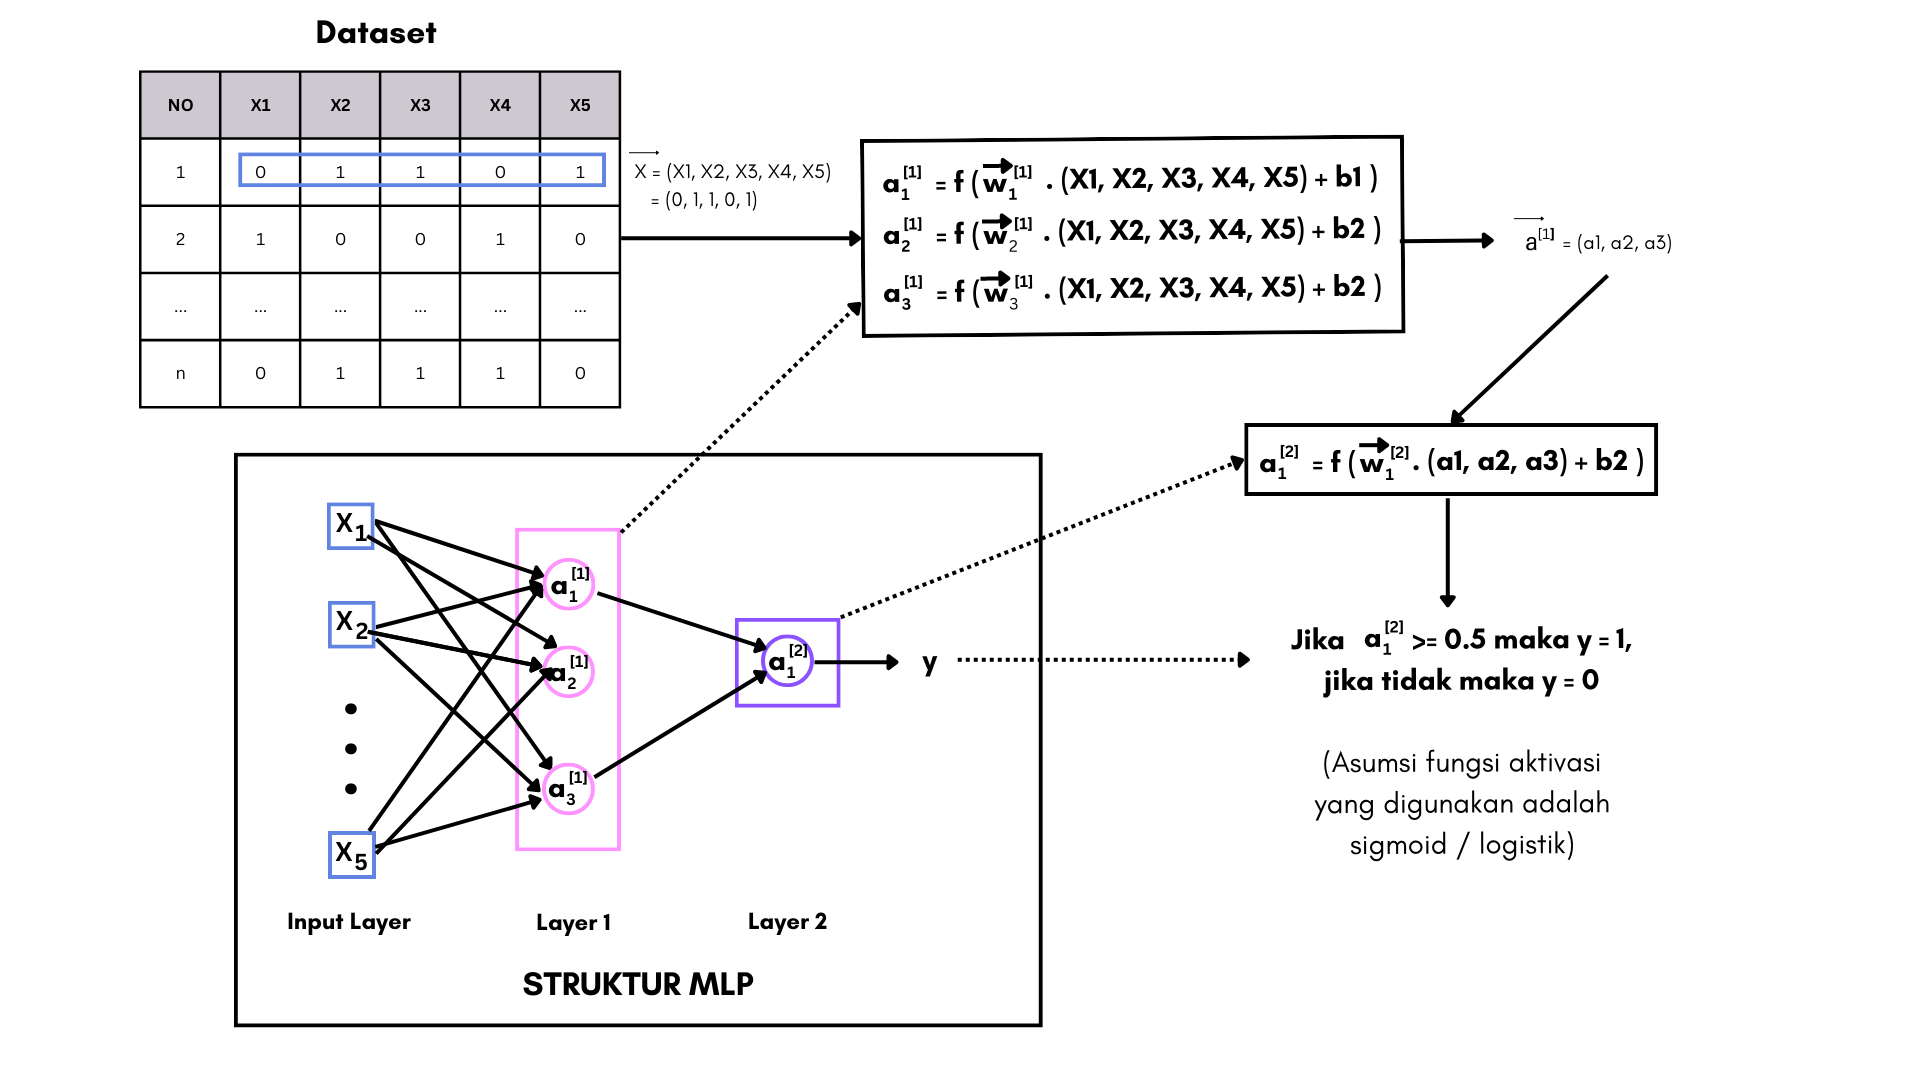

Struktur MLP umumnya terdiri dari tiga buah jenis layer:


*   **Input layer**, yang memiliki jumlah sesuai dengan jumlah fitur dataset. Apabila terdapat 5 fitur, maka input layer memiliki 5 neuron. 
*   **Hidden Layer** (Layer 1), merupakan layer "tersembunyi" diantara input layer dan output layer (Layer 2) yang berisikan neuron komputasional. Meskipun pada gambar di atas hanya terdapat 1 hidden layer, pada kenyataannya kita dapat memvariasikan jumlah hidden layer sesuai kebutuhan kita. Hasil dari hidden layer ini akan masuk sebagai vektor ke output layer atau ke hidden layer berikutnya. 
*   **Output Layer** (Layer 2), merupakan layer yang menentukan hasil klasifikasi. Pada kasus binary classification, umumnya kita hanya memerlukan 1 neuron pada output layer. ***Jika menggunakan fungsi aktivasi logistik (sigmoid)***, selanjutnya hasil dari neuron ini akan masuk ke dalam threshold yang ditentukan, apabila hasilnya >= 0.5 maka diklasifikasikan sebagai label 1 dan apabila < 0.5 maka diklasifikasikan sebagai label 0

Pada setiap neuron dalam hidden layer, terdapat beberapa komponen dalam sebagai berikut:


*   **Weight**, merupakan sebuah parameter yang dikalikan dengan vektor input dari setiap hidden layer. Parameter ini menunjukkan "kekuatan" neuron dalam layer dan ditentukan oleh model pada proses training dan dioptimalkan dengan cara meminimalkan loss function menggunakan algoritma tertentu, misalnya back propagation. 
*   **Bias**, merupakan konstanta tambahan yang digunakan untuk menyesuaikan output dari masing-masing neuron sehingga lebih sesuai dengan output yang diharapkan





### **Pertanyaan 1**

**Pertanyaan 1**: Apabila dalam binary classification dibutuhkan 1 neuron dalam output layer, berapa neuron yang dibutuhkan dalam output layer untuk multiclass classification? Jelaskan alasan Anda

*Letakkan jawaban pada sel ini:*

### Fungsi Aktivasi 

Pada setiap neuron, setelah menghitung vektor input dengan weight dan bias, perhitungan ini dimasukkan kedalam fungsi aktivasi yang akan menghasilkan output dari neuron tersebut. Berikut adalah daftar beberapa fungsi aktivasi:

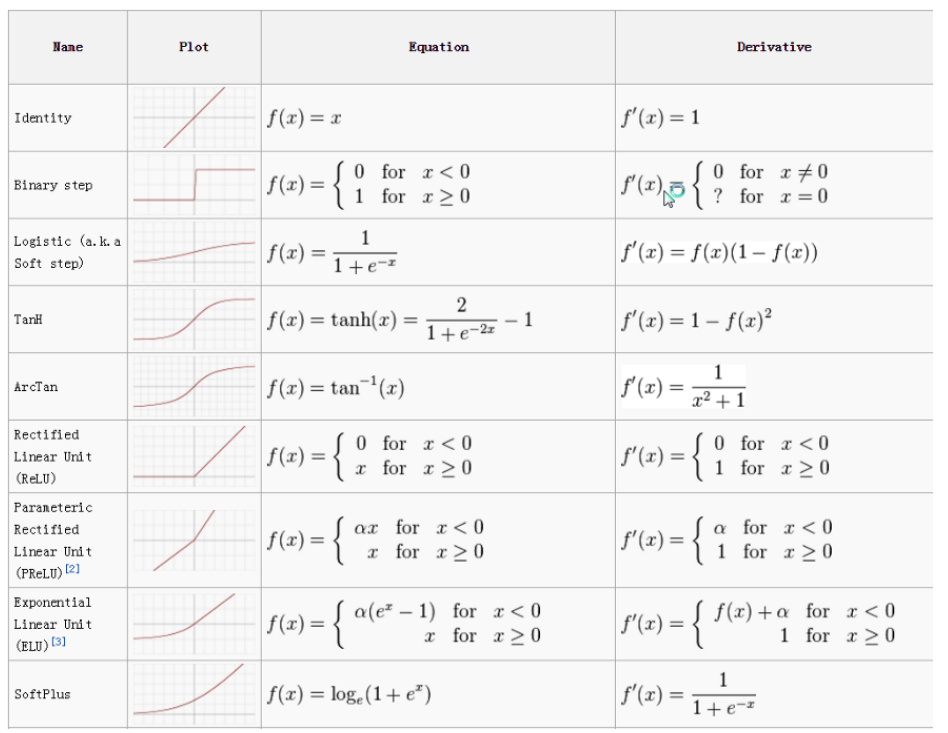

Selain fungsi aktivasi, dalam Neural Networks kita juga mengenal **loss function** / cost function yang menentukan "kemiripan" antara output yang dihasilkan model dengan output sebenarnya. Oleh karena itu, semakin baik model maka semakin kecil nilai loss function. Beberapa loss function yang kita kenal adalah:

* Mean Average Error (MAE) 
* Mean Square Error (MSE)
* Cross Entropy Loss
* Huber Loss
* KL Divergence 

Sumber: PPT Neural Networks KASDD

## **Binary Classification dengan MLP Classifier**

### Dataset

Pada contoh kali ini, kita akan menggunakan dataset [Titanic Dataset](https://data.world/nrippner/titanic-disaster-dataset) dengan perubahan. Dataset ini terdiri dari 891 baris data dengan 10 fitur dan 1 label, yaitu survival bernilai 0 jika penumpang tidak selamat dan bernilai 1 jika penumpang selamat.

Features
* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin 
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Import dataset
titanic = pd.read_csv('titanic.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Eksplorasi Dataset

In [5]:
# Melihat Informasi Kolom
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan eksplorasi di atas, kita dapat melihat bahwa di antara 10 fitur 6 adalah fitur nominal (Name, Sex, Ticket, Cabin, Embarked), 1 ordinal (PClass), dan 4 numerik (PassengerId, SibSp, Parch, Fare). Serta label "survival" sendiri adalah fitur nominal. Selanjutnya mari kita eksplorasi lebih lanjut statistik dari fitur-fitur pada dataset ini:

In [6]:
# Deskripsi statistik atribut numerik
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Deskripsi statistik atribut kategorikal 
titanic.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Pada deskripsi statistik, kita dapat melihat sekilas bahwa terdapat beberapa variabel dengan nilai null yang signifikan. Mari kita lihat jumlahnya:

In [8]:
# Check for null values in each column
null_counts = titanic.isnull().sum()

# Print the null counts for each column
print("Null counts for each column:")
print(null_counts)

Null counts for each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Jumlah nilai value pada cabin 687, ini adalah angka yang sangat besar sehingga kita dapat mengkonsiderasi untuk menghapus kolom ini. Sementara kita akan mem-process missing value pada "age" dan "embarked" pada tahap berikutnya. 

#### Data Pre-processing

Pertama-tama kita akan melakukan drop pada fitur cabin karena memiliki terlalu banyak nilai null kemudian juga pada fitur ticket, passengerId, dan name karena secara intuitif nomor tiket, passengerId, dan nama tidak akan mempengaruhi survival rate dari seseorang.

In [9]:
titanic = titanic.drop(['Ticket', 'PassengerId', 'Name', 'Cabin'], axis = 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Sekarang kita hanya memiliki 7 fitur dan 1 label. Langkah selanjutnya yang akan kita lakukan adalah melakukan encoding pada dua fitur kategorikal, yaitu 'Sex' dan Embarked'.  

In [10]:
# Melakukan Ordinal Encoding pada kolom 'Sex' 
titanic['Sex'] = titanic['Sex'].map({'female':0, 'male':1})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [11]:
# Melakukan One-Hot Encoding pada kolom 'Embarked'
titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


Selanjutnya, kita akan "mengisi" nilai null pada kolom "Age" dengan metode KNN menggunakan KNNImputer sebagai berikut:

In [12]:
from sklearn.impute import KNNImputer

# create KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# fit and transform the imputer on the column
titanic[['Age']] = imputer.fit_transform(titanic[['Age']])

In [13]:
# Check for null values in each column
null_counts = titanic.isnull().sum()

# Print the null counts for each column
print("Jumlah nilai null pada masing-masing kolom setelahnya:")
print(null_counts)

Jumlah nilai null pada masing-masing kolom setelahnya:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


##### **Pertanyaan 2 & 3**

**Pertanyaan 2**: Menurut Anda, mengapa dalam model Neural Networks kita perlu melakukan encoding pada fitur kategorikal? Jelaskan jawaban Anda

*Letakkan jawaban pada sel ini:*

**Pertanyaan 3**: Apa perbedaan one-hot encoding dengan Ordinal Encoding dan apa keuntungan menggunakan masing-masing metode? Jelaskan jawaban Anda

*Letakkan jawaban pada sel ini:*

### Pembuatan Model dengan MLPClassifier

Pada lab kali ini kita akan menggunakan *built-in class* dari sklearn yaitu **MLP Classifier** untuk melakukan klasifikasi dengan Neural Networks. Konsep MLP classifier sendiri menerapkan prinsip feed-forward. Terdapat beberapa hyper-parameter pada kelas ini diantaranya sebagai berikut:

*   Hidden Layer Size : (n1, n2, ..) dimana n1, n2, dst dapat diisi dengan integer yang menunjukkan jumlah neuron pada masing-masing hidden layer, default: (100,)
*   Activation : Fungsi Aktvasi yang digunakan untuk seluruh hidden layer
*   Solver : solver yang digunakan untuk optimasi weight 
*   Alpha : nilai regularisasi L2 yang digunakan untuk regularisasi parameter 

Selengkapnya silakan baca pada link berikut: [MLP Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Pertama-tama kita akan melakukan import kelas MLPClassifier dan membuat sebuah model classifier dengan fungsi aktivasi: 'relu', solver: 'adam', dan menggunakan dua buah hidden layer masing-masing dengan 7 layer dan 5 layer sebagai berikut

In [14]:
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore') 

# Splitting dataset ke dalam train dan test set
X = titanic.drop(['Survived'], axis = 1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = MLPClassifier(
    solver='sgd',
    activation='relu',
    early_stopping = True, 
    alpha=1e-5,
    hidden_layer_sizes=(13, 8),
    random_state=42,
    verbose=True
)

Selanjutnya kita akan melatih dan memprediksi dataset dengan model classifier menggunakan kode berikut:

In [15]:
# Fit Model
classifier.fit(X_train, y_train)

# Prediksi dengan Model Classifier
pred = classifier.predict(X_test)

Iteration 1, loss = 1.72001391
Validation score: 0.507937
Iteration 2, loss = 0.78541631
Validation score: 0.603175
Iteration 3, loss = 0.78844121
Validation score: 0.603175
Iteration 4, loss = 0.84178261
Validation score: 0.587302
Iteration 5, loss = 0.79496727
Validation score: 0.603175
Iteration 6, loss = 0.71705714
Validation score: 0.619048
Iteration 7, loss = 0.68735901
Validation score: 0.619048
Iteration 8, loss = 0.67847926
Validation score: 0.603175
Iteration 9, loss = 0.68083176
Validation score: 0.619048
Iteration 10, loss = 0.67379904
Validation score: 0.634921
Iteration 11, loss = 0.66726384
Validation score: 0.619048
Iteration 12, loss = 0.66251483
Validation score: 0.666667
Iteration 13, loss = 0.65702380
Validation score: 0.666667
Iteration 14, loss = 0.65329398
Validation score: 0.619048
Iteration 15, loss = 0.64862310
Validation score: 0.682540
Iteration 16, loss = 0.64982852
Validation score: 0.634921
Iteration 17, loss = 0.64513417
Validation score: 0.682540
Iterat

Setelah melakukan prediksi, maka kita akan mengevaluasi hasil prediksi menggunakan parameter akurasi sebagai berikut:

In [16]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.664179104477612


## **Regression dengan MLP Regressor**

Selain MLPClassifier, Library SKLearn juga memiliki kelas MLPRegressor yang dapat digunakan untuk pembuatan model neural networks pada kasus regresi. Silakan baca dokumentasi MLPRegressor pada link ini: [Dokumentasi MLP Regressor ](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

### Dataset

Pada contoh kali ini, kita akan menggunakan dataset diabetes dari library SKLearn sebagai berikut

In [17]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes(as_frame=True)

# Extract the features and target variable
X = diabetes.data
y = diabetes.target

# Print the shape of the data and target arrays
print(f"Data shape: {X.shape}")
print(f"Target / Label shape: {y.shape}")


Data shape: (442, 10)
Target / Label shape: (442,)


Mari kita lihat deskripsi dari dataset tersebut

In [18]:
# Description of the dataset
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [19]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [20]:
# Compute the range of target values
target_min = np.min(diabetes.target)
target_max = np.max(diabetes.target)

print("Target range: [{:.1f}, {:.1f}]".format(target_min, target_max))

Target range: [25.0, 346.0]


Berdasarkan deskripsi di atas, kita dapat melihat bahwa dataset ini berisi 10 atribut numerik yang telah dinormalisasi menggunakan Z-score. Selain itu, kita juga dapat mengetahui bahwa label atau target dari dataset ini menunjukkan nilai kuantitatif pada 'disease progression' atau perkembangan penyakit diabetes pada 442 pasien selama satu tahun. Selanjutnya, mari kita lihat deskripsi statistik sekaligus melakukan pengecekan pada missing value dan outlier.

In [21]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [22]:
# Check for null values in each column
null_counts = X.isnull().sum()

# Print the null counts for each column
print("Null counts for each column:")
print(null_counts)


Null counts for each column:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [23]:
# Calculate the IQR for each feature
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1

# Define a threshold for detecting outliers
threshold = 1.5

# Detect outliers using the IQR method
outliers = (X < (Q1 - threshold * IQR)) | (X > (Q3 + threshold * IQR))

# Print the number of outliers detected for each feature
print("Number of outliers detected for each feature:")
print(np.sum(outliers, axis=0))


Number of outliers detected for each feature:
age    0
sex    0
bmi    3
bp     0
s1     8
s2     7
s3     7
s4     2
s5     4
s6     9
dtype: int64


Karena tidak terdapat missing value, jumlah outlier yang sedikit, serta dataset telah dinormalisasi terlebih dahulu, maka kita akan melanjutkan ke tahap pembuatan model menggunakan MLP Regressor

### Pembuatan Model dengan MLP Regressor

In [24]:
# Splitting dataset ke dalam train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train an MLPRegressor model
regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, random_state=42)
regressor.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error on test set: {:.2f}".format(mse))
print("R2 score on test set: {:.2f}".format(r2))

Mean squared error on test set: 2862.90
R2 score on test set: 0.47


## **Latihan**: Multiclass Classification dengan MLP Classifier

### Dataset

Pada tutorial ini, dataset yang digunakan adalah dataset Iris. Dataset Iris adalah dataset multivariat yang diperkenalkan oleh Ronald Fisher pada tahun 1936 melalui penelitiannya yang berjudul "***The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis***". 
  
Dataset ini berisi informasi tentang komponen bunga serta spesiesnya. Dataset ini berisi 50 baris sampel dari setiap spesies. Total terdapat 3 buah spesies dengan masing - masing berjumlah 50 baris data. Dataset ini berisi kolom sebagai berikut:

1.  **sepal_length** (Dalam unit centimeter, float)
2.  **sepal_width** (Dalam unit centimeter, float)
3.  **petal_length** (Dalam unit centimeter, float)
4.  **petal_width** (Dalam unit centimeter, float)
5.  **species** (3 Kelas, string)

Dataset yang digunakan diambil dari UCI machine learning. Pastikan laptop Anda terhubung dengan internet. Kemudian, karena dataset ini tidak memiliki header, maka header harus ditambahkan secara manual

In [26]:
import warnings
warnings.filterwarnings('ignore') 

#Define the col names
colnames=["sepal_length", "sepal_width","petal_length","petal_width", "species"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [27]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Berdasarkan hasil perhitungan spesies, kita dapatkan bahwa dataset terbagi secara merata (tidak ada ketimpangan pada dataset).

In [28]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Berdasarkan hasil eksplorasi statistik, tidak terdapat missing value pada seluruh fitur sehingga kita tidak akan menangani missing values.

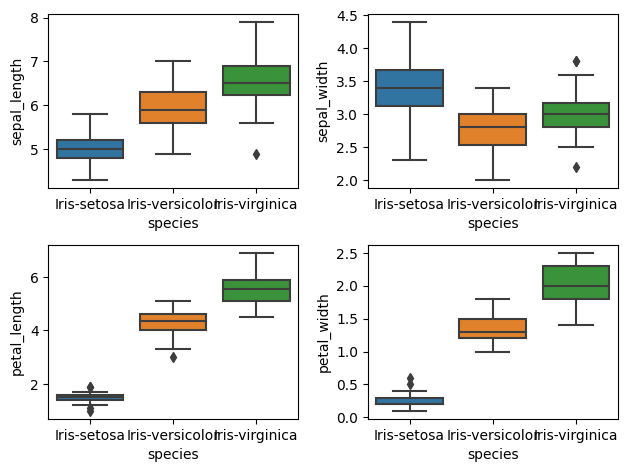

In [29]:
# Visualisasi dengan Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = dataset, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = dataset,  order = cn, ax = axs[1,1]);

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

Berdasarkan data dari Boxplot, nilai outlier relatif kecil sehingga kita tidak akan menangani outlier. 

### Data Pre-processing

1. Lakukan Normalisasi dengan jenis Min-Max pada setiap kolom dalam dataframe, kecuali kolom spesies, kemudian tampilkan 5 baris data pertama

In [30]:
# 1. Tuliskan Jawaban Anda di sini 

2. Lakukan Encoding pada kolom "spesies" yang awalnya berupa "string" menjadi data nominal dengan konversi sebagai berikut, **kemudian tampilkan 10 baris data pertama**:
>* Iris-setosa = 1
>* Iris-versicolor = 2
>* Iris-verginica = 3







In [31]:
# 2. Tuliskan Jawaban Anda di sini
# Encoding

# Menampilkan 10 baris sampel pertama yang sudah dimodifikasi speciesnya

<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to Expand) </b></font></summary>

Berikut ini adalah ekspektasi Jawaban Latihan 1 dan 2, sebelum melanjutkan ke tahap selanjutnya. Harap periksa kembali sebelum melanjutkan agar tidak terjadi kesalahan di tahap berikutnya
  

<img src="https://i.ibb.co/Cmwr5fT/Screen-Shot-2021-11-24-at-13-06-25.png" alt="Fasilkom UI" width="500"/>

3. Split dataset menjadi train dan test set dengan perbandingan 70 : 30 dan random_state = 2021

In [32]:
# 3. Tuliskan Jawaban Anda di sini 

### Pembuatan Model dengan MLPClassifier

4. Buatlah 3 buah model MLPClassifier dengan ketentuan sebagai berikut
> Untuk semua model (parameter berlaku untuk ketiganya): 
> *   alpha = 1e-5
> *   Memiliki dua hidden layer (di luar input dan output layer) dengan neuron masing-masing 3 dan activation function = relu
> *   random_state = 2021
> *   verbose = True
> *   early_stropping = True

  > Ketentuan tambahan untuk masing-masing model:
  > * Model 1: solver = 'adam' 
  > * Model 2: solver = 'sgd', learning_rate = 'invscaling', learning_rate_init = 1e-5
  > * Model 3: solver = 'lbfgs'





In [33]:
# 4a. Model 1

In [34]:
# 4b. Model 2

In [35]:
# 4c. Model 3

5. Lakukan training dan evaluasi untuk masing-masing model, kemudian **tampilkan confusion matrix** serta parameter evaluasi lainnya yang Anda rasa penting!

In [36]:
# 5a. Training dan Evaluasi Model 1

# Train and Prediction

# Menampilkan evaluasi untuk MLP Classifier

In [37]:
# 5b. Training dan Evaluasi Model 2

# Train and Prediction

# Menampilkan evaluasi untuk MLP Classifier

In [38]:
# 5c. Training dan Evaluasi Model 3

# Train and Prediction

# Menampilkan evaluasi untuk MLP Classifier

6. Menurut Anda, model manakah di antara ketiga model di atas yang memiliki performa terbaik? Jelaskan alasan Anda.

*Letakkan jawaban pada sel ini:*

### Evaluasi dengan Classifier Lain

7. Lakukan klasifikasi di atas minimal dengan 2 model classifier lain

In [39]:
# 7a. Klasifikasi dengan Classifier Lain (1)

# Evaluasi menggunakan confusion matrix

In [40]:
# 7b. Klasifikasi dengan Classifier Lain (2)

# Evaluasi menggunakan Confusion Matrix

8. Setelah melakukan evaluasi dengan classifier lain, menurut Anda, kapan penggunaan Neural Networks untuk klasifikasi lebih menguntungkan?

*Letakkan jawaban Anda pada sel ini*
